You are given an m x n grid where each cell can have one of three values:

    0 representing an empty cell,
    1 representing a fresh orange, or
    2 representing a rotten orange.

Every minute, any fresh orange that is 4-directionally adjacent to a rotten orange becomes rotten.

Return the minimum number of minutes that must elapse until no cell has a fresh orange. If this is impossible, return -1.

 

Example 1:

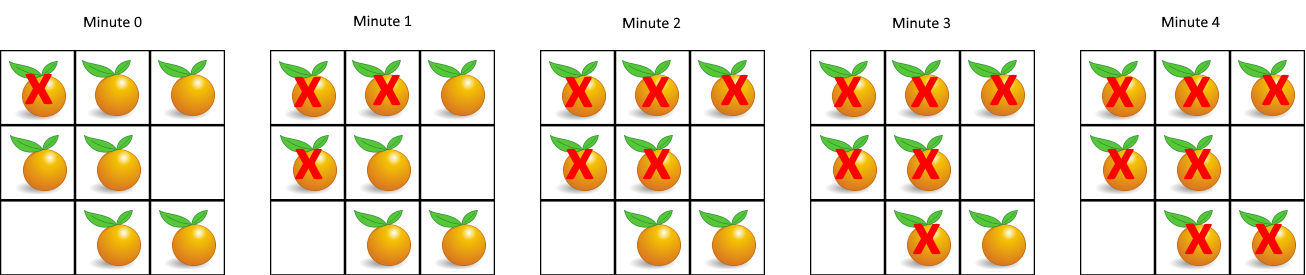

Input: grid = [[2,1,1],[1,1,0],[0,1,1]]
Output: 4

Example 2:

Input: grid = [[2,1,1],[0,1,1],[1,0,1]]
Output: -1
Explanation: The orange in the bottom left corner (row 2, column 0) is never rotten, because rotting only happens 4-directionally.

Example 3:

Input: grid = [[0,2]]
Output: 0
Explanation: Since there are already no fresh oranges at minute 0, the answer is just 0.

 

Constraints:

    m == grid.length
    n == grid[i].length
    1 <= m, n <= 10
    grid[i][j] is 0, 1, or 2.



In [ ]:
class Solution:
    def orangesRotting(self, grid: List[List[int]]) -> int:
        def switch(val):
            if val == 2:
                return 0
            if val == 1:
                return -1
            if val == 0:
                return -2
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                grid[i][j] = switch(grid[i][j])

        def dfs(i, j):
            curr = grid[i][j]
            nxt = curr + 1
            for di, dj in ([-1, 0], [1, 0], [0, -1], [0, 1]):
                if 0 <= i + di < len(grid) and 0 <= j + dj < len(grid[0]):
                    if (grid[i + di][j + dj] == -1) or (grid[i + di][j + dj] > nxt):
                        grid[i + di][j + dj] = nxt
                        dfs(i + di, j + dj)

        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j] == 0:
                    dfs(i, j)

        ans = any([-1 in row for row in grid])
        if ans:
            return -1
        
        return max(0, max([max(row) for row in grid]))
